In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
feature_ids = [1,2]
CONVERTED_DATABASE_NAME = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt.sqlite'

In [4]:
summed_frame_df = []
for feature_id in feature_ids:
    db_name = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id, feature_id)
    db_conn = sqlite3.connect(db_name)
    summed_frame_df.append((pd.read_sql_query("select * from summed_ms1_regions order by peak_id".format(feature_id), db_conn)))
    db_conn.close()

In [5]:
len(summed_frame_df)

2

In [6]:
summed_frame_df[0].head()

,feature_id,point_id,mz,retention_time_secs,scan,intensity,number_frames,peak_id,feature_point
0,1,1,654.644417,4013.954457,668,104602,2,1,1|1
1,1,3,654.644968,4013.516683,669,120400,2,1,1|3
2,1,6,654.646004,4013.797036,670,119329,2,1,1|6
3,1,9,654.644826,4013.857628,671,122774,2,1,1|9
4,1,12,654.644708,4012.877229,672,157409,3,1,1|12


In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

ax = Axes3D(fig)

ax.elev = 20.0
ax.azim = 250.0
ax.dist = 10.0

plt.gca().invert_yaxis()
plt.xlabel('m/z')
plt.ylabel('scan')

mz_min = 894
mz_max = 900
scan_min = 250
scan_max = 550

# ax.set_xlim(left=200, right=1800)
# ax.set_ylim(bottom=900, top=0)
ax.set_xlim(left=mz_min, right=mz_max)
ax.set_ylim(bottom=scan_max, top=scan_min)
ax.set_zlim(bottom=0, top=120000)

frame_df = frames_df[frames_df.frame_id==frame_id]
clipped_frame_df = frame_df[(frame_df.mz >= mz_min) & (frame_df.mz <= mz_max) & (frame_df.scan >= scan_min) & (frame_df.scan <= scan_max)]

ax.scatter(clipped_frame_df.mz, clipped_frame_df.scan, clipped_frame_df.intensity, c=np.log(clipped_frame_df.intensity), cmap='cool')
fig.suptitle('Frame {}'.format(frame_id), fontsize=16, x=0.5, y=0.85)
plt.show()

In [7]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

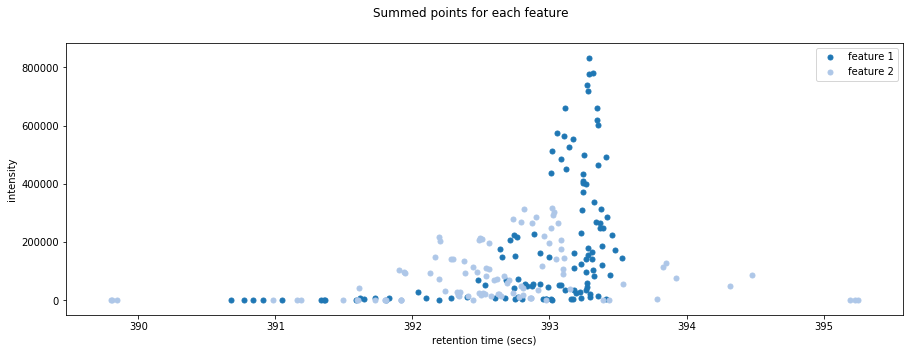

In [25]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    feature_summed_points_df = df[idx]
    ax.plot(summed_frame_df.retention_time_secs, feature_summed_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')
plt.suptitle('Summed points for each feature')
plt.margins(0.06)
plt.show()

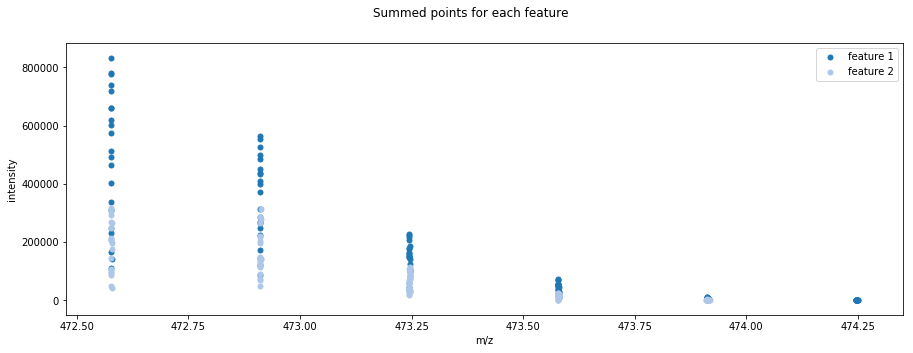

In [27]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    feature_summed_points_df = df[idx]
    ax.plot(feature_summed_points_df.mz, feature_summed_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
plt.suptitle('Summed points for each feature')
plt.margins(0.06)
plt.show()

In [35]:
c_df = []
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
for feature_id in feature_ids:
    c_df.append(pd.read_sql_query("select * from clusters where feature_id={}".format(feature_id), db_conn))
db_conn.close()

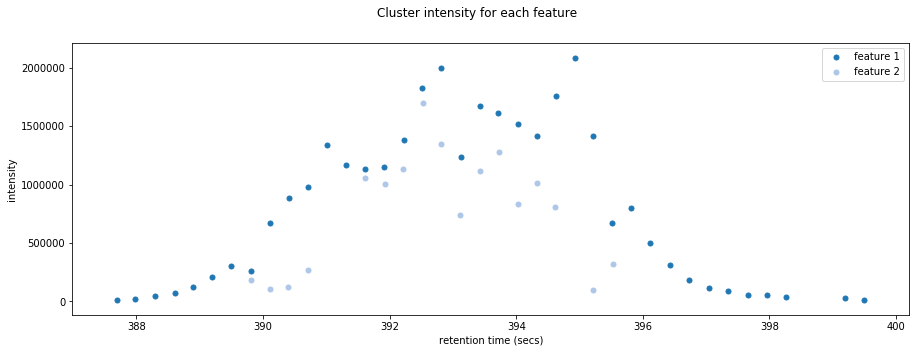

In [40]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    clusters_df = c_df[idx]
    ax.plot(clusters_df.retention_time_secs, clusters_df.intensity_sum, marker='o', color=tableau20[idx], linestyle='', ms=5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')
plt.suptitle('Cluster intensity for each feature')
plt.margins(0.06)
plt.show()

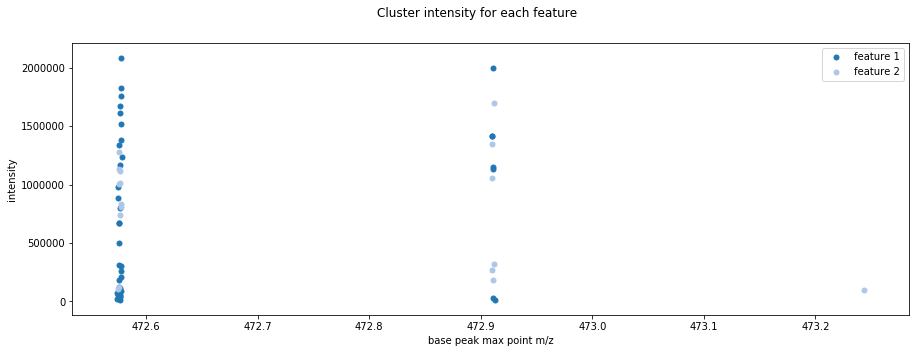

In [44]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    clusters_df = c_df[idx]
    ax.plot(clusters_df.base_peak_max_point_mz, clusters_df.intensity_sum, marker='o', color=tableau20[idx], linestyle='', ms=5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('base peak max point m/z')
plt.ylabel('intensity')
plt.suptitle('Cluster intensity for each feature')
plt.margins(0.06)
plt.show()